In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline


Credit Card transactions contain many confidential data that cannot be shared. Hence the ideal approach is to apply principal component analysis to identify the key influencers and build model based on them 

In [128]:

import pandas as pd

df = pd.read_csv('/project_data/data_asset/2_fraudTrainPart.csv')
df.head()


,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,1/1/2019 0:00,2703190000000000,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",9/3/1988,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1/1/2019 0:00,630423000000,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,21/6/1978,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,1/1/2019 0:00,38859500000000,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,19/1/1962,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,1/1/2019 0:01,3534090000000000,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,12/1/1967,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,1/1/2019 0:03,375534000000000,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,28/3/1986,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [129]:
df.dtypes

trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [130]:
df['cc_num'] = df['cc_num'].astype('category')
df['city'] = df['city'].astype('category')
df['city'] = df['city'].cat.codes
df['cc_num'] = df['cc_num'].cat.codes
df.head(5)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,1/1/2019 0:00,395,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,486,...,36.0788,-81.1781,3495,"Psychologist, counselling",9/3/1988,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1/1/2019 0:00,36,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,560,...,48.8878,-118.2105,149,Special educational needs teacher,21/6/1978,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,1/1/2019 0:00,215,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,433,...,42.1808,-112.2620,4154,Nature conservation officer,19/1/1962,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,1/1/2019 0:01,451,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,81,...,46.2306,-112.1138,1939,Patent attorney,12/1/1967,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,1/1/2019 0:03,327,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,202,...,38.4207,-79.4629,99,Dance movement psychotherapist,28/3/1986,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [131]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['category'] = labelencoder.fit_transform(df['category'])
df['merchant'] = labelencoder.fit_transform(df['merchant'])
df['job'] = labelencoder.fit_transform(df['job'])
df['gender'] = labelencoder.fit_transform(df['gender'])
df['street'] = labelencoder.fit_transform(df['street'])
df['state'] = labelencoder.fit_transform(df['state'])
df['dob'] = labelencoder.fit_transform(df['dob'])
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,1/1/2019 0:00,395,514,8,4.97,Jennifer,Banks,0,515,486,...,36.0788,-81.1781,3495,353,867,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1/1/2019 0:00,36,241,4,107.23,Stephanie,Gill,0,400,560,...,48.8878,-118.2105,149,408,404,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,1/1/2019 0:00,215,390,0,220.11,Edward,Sanchez,1,548,433,...,42.1808,-112.2620,4154,292,298,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,1/1/2019 0:01,451,360,2,45.00,Jeremy,White,1,844,81,...,46.2306,-112.1138,1939,313,79,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,1/1/2019 0:03,327,297,9,41.96,Tyler,Garcia,1,385,202,...,38.4207,-79.4629,99,110,595,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [132]:
df.drop("trans_date_trans_time",  axis=1, inplace=True)
df.drop("first",  axis=1, inplace=True)
df.drop("last",  axis=1, inplace=True)
df.drop( "trans_num", axis=1, inplace=True)
df.head()

,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud
0,395,514,8,4.97,0,515,486,26,28654,36.0788,-81.1781,3495,353,867,1325376018,36.011293,-82.048315,0
1,36,241,4,107.23,0,400,560,46,99160,48.8878,-118.2105,149,408,404,1325376044,49.159047,-118.186462,0
2,215,390,0,220.11,1,548,433,12,83252,42.1808,-112.2620,4154,292,298,1325376051,43.150704,-112.154481,0
3,451,360,2,45.00,1,844,81,25,59632,46.2306,-112.1138,1939,313,79,1325376076,47.034331,-112.561071,0
4,327,297,9,41.96,1,385,202,44,24433,38.4207,-79.4629,99,110,595,1325376186,38.674999,-78.632459,0


In [133]:
df.T.head(20)

,0,1,2,3,4,5,6,7,8,9,...,6999,7000,7001,7002,7003,7004,7005,7006,7007,7008
cc_num,3.950000e+02,3.600000e+01,2.150000e+02,4.510000e+02,3.270000e+02,6.730000e+02,1.390000e+02,7.330000e+02,6.940000e+02,4.030000e+02,...,3.350000e+02,7.600000e+01,7.320000e+02,8.300000e+01,7.600000e+02,8.340000e+02,6.020000e+02,5.890000e+02,6.580000e+02,7.220000e+02
merchant,5.140000e+02,2.410000e+02,3.900000e+02,3.600000e+02,2.970000e+02,6.070000e+02,5.340000e+02,1.070000e+02,2.500000e+02,5.630000e+02,...,3.960000e+02,2.950000e+02,1.240000e+02,5.680000e+02,2.660000e+02,6.520000e+02,2.640000e+02,3.490000e+02,1.500000e+01,5.660000e+02
category,8.000000e+00,4.000000e+00,0.000000e+00,2.000000e+00,9.000000e+00,2.000000e+00,3.000000e+00,2.000000e+00,9.000000e+00,4.000000e+00,...,7.000000e+00,1.100000e+01,5.000000e+00,1.300000e+01,0.000000e+00,7.000000e+00,7.000000e+00,1.200000e+01,6.000000e+00,5.000000e+00
amt,4.970000e+00,1.072300e+02,2.201100e+02,4.500000e+01,4.196000e+01,9.463000e+01,4.454000e+01,7.165000e+01,4.270000e+00,1.983900e+02,...,1.497700e+02,6.243100e+02,1.554000e+01,7.995000e+02,6.855000e+01,7.125000e+01,5.072000e+01,4.420000e+00,7.883000e+01,7.341000e+01
gender,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
street,5.150000e+02,4.000000e+02,5.480000e+02,8.440000e+02,3.850000e+02,4.330000e+02,8.020000e+02,2.050000e+02,6.250000e+02,1.950000e+02,...,3.520000e+02,3.950000e+02,1.410000e+02,2.520000e+02,1.370000e+02,2.190000e+02,8.790000e+02,4.390000e+02,8.200000e+01,6.500000e+01
city,4.860000e+02,5.600000e+02,4.330000e+02,8.100000e+01,2.020000e+02,2.080000e+02,3.290000e+02,2.200000e+02,4.390000e+02,1.390000e+02,...,7.270000e+02,1.430000e+02,7.100000e+01,5.640000e+02,6.240000e+02,7.930000e+02,5.130000e+02,4.790000e+02,1.760000e+02,6.980000e+02
state,2.600000e+01,4.600000e+01,1.200000e+01,2.500000e+01,4.400000e+01,3.700000e+01,1.500000e+01,4.400000e+01,3.700000e+01,4.100000e+01,...,2.800000e+01,1.000000e+00,1.000000e+00,2.100000e+01,5.000000e+00,1.700000e+01,3.900000e+01,3.000000e+01,9.000000e+00,3.700000e+01
zip,2.865400e+04,9.916000e+04,8.325200e+04,5.963200e+04,2.443300e+04,1.891700e+04,6.785100e+04,2.282400e+04,1.566500e+04,3.704000e+04,...,6.916500e+04,3.504900e+04,3.522900e+04,4.837100e+04,8.164900e+04,7.129100e+04,2.980900e+04,7.750000e+03,3.984000e+04,1.548000e+04
lat,3.607880e+01,4.888780e+01,4.218080e+01,4.623060e+01,3.842070e+01,4.037500e+01,3.799310e+01,3.884320e+01,4.033590e+01,3.652200e+01,...,4.115580e+01,3.397780e+01,3.346290e+01,4.282230e+01,3.945840e+01,3.253170e+01,3.341300e+01,4.033300e+01,3.177060e+01,3.999610e+01


In [134]:
df = df.T
df = df.reset_index()
df.drop("index",  axis=1, inplace=True)
df=df.T
df.rename(columns={17:'is_fraud'}, inplace=True)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,is_fraud
0,395.0,514.0,8.0,4.97,0.0,515.0,486.0,26.0,28654.0,36.0788,-81.1781,3495.0,353.0,867.0,1.325376e+09,36.011293,-82.048315,0.0
1,36.0,241.0,4.0,107.23,0.0,400.0,560.0,46.0,99160.0,48.8878,-118.2105,149.0,408.0,404.0,1.325376e+09,49.159047,-118.186462,0.0
2,215.0,390.0,0.0,220.11,1.0,548.0,433.0,12.0,83252.0,42.1808,-112.2620,4154.0,292.0,298.0,1.325376e+09,43.150704,-112.154481,0.0
3,451.0,360.0,2.0,45.00,1.0,844.0,81.0,25.0,59632.0,46.2306,-112.1138,1939.0,313.0,79.0,1.325376e+09,47.034331,-112.561071,0.0
4,327.0,297.0,9.0,41.96,1.0,385.0,202.0,44.0,24433.0,38.4207,-79.4629,99.0,110.0,595.0,1.325376e+09,38.674999,-78.632459,0.0


# PCA analysis
#### Principal Component Analysis (or PCA) uses linear algebra to transform the dataset into a compressed form.

#### Generally this is called a data reduction technique. A property of PCA is that you can choose the number of dimensions or principal component in the transformed result.

#### In this case we will use it to analyse the feature importanace

We will reduce the data into two features.

![](https://media.giphy.com/media/QA44U3zAnH0ha/source.gif)

In [136]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(df.drop("is_fraud", axis=1))

from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=10)
Y_sklearn = sklearn_pca.fit_transform(X_std)

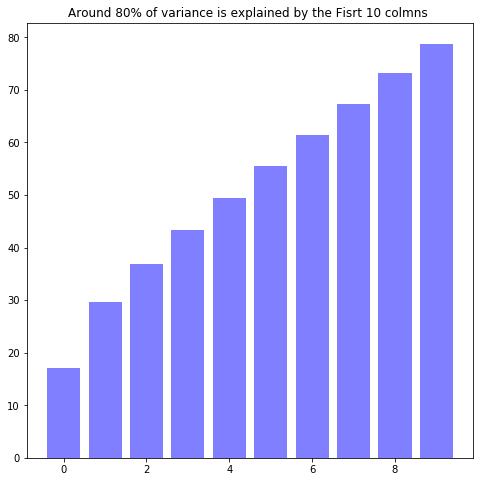

In [139]:
cum_sum = sklearn_pca.explained_variance_ratio_.cumsum()

sklearn_pca.explained_variance_ratio_[:10].sum()

cum_sum = cum_sum*100

fig, ax = plt.subplots(figsize=(8,8))
plt.bar(range(10), cum_sum, label='Cumulative _Sum_of_Explained _Varaince', color = 'b',alpha=0.5)
plt.title("Around 80% of variance is explained by the Fisrt 10 colmns ");

In [140]:
X_reduced2 = Y_sklearn

In [141]:
df.is_fraud.values

array([0., 0., 0., ..., 0., 0., 0.])

In [145]:
train = pd.DataFrame(X_reduced2)
train['is_fraud'] =  df['is_fraud'].reset_index().is_fraud
train.head(3)

,0,1,2,3,4,5,6,7,8,9,is_fraud
0,-1.035279,-1.004042,-0.366098,-1.514648,0.085174,-0.299349,-1.506320,0.214431,0.040901,0.123157,0.0
1,2.890405,3.366072,-1.148816,0.604205,0.023639,-1.613698,-0.726942,-0.590383,-0.467806,-0.108208,0.0
2,2.387533,1.380523,0.900326,0.422875,-0.417090,-0.972503,-0.032664,0.602646,-2.175715,-0.200912,0.0


## To just give the glimpse of what PCA does to data, I am reducing it to 3 components,But in final modeling we will use 30 var.**

[]

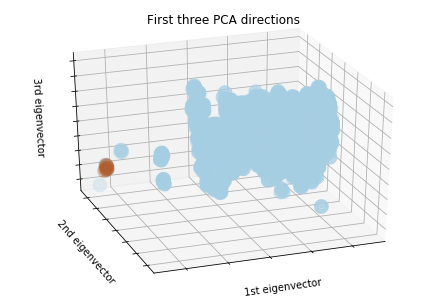

In [146]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=3)
X_reduced  = sklearn_pca.fit_transform(X_std)
Y=train['is_fraud']
from mpl_toolkits.mplot3d import Axes3D
plt.clf()
fig = plt.figure(1, figsize=(10,6 ))
ax = Axes3D(fig, elev=-150, azim=110,)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=Y,cmap=plt.cm.Paired,linewidths=10)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])


Text(0.5, 1.0, 'This The 2D Transformation of above graph ')

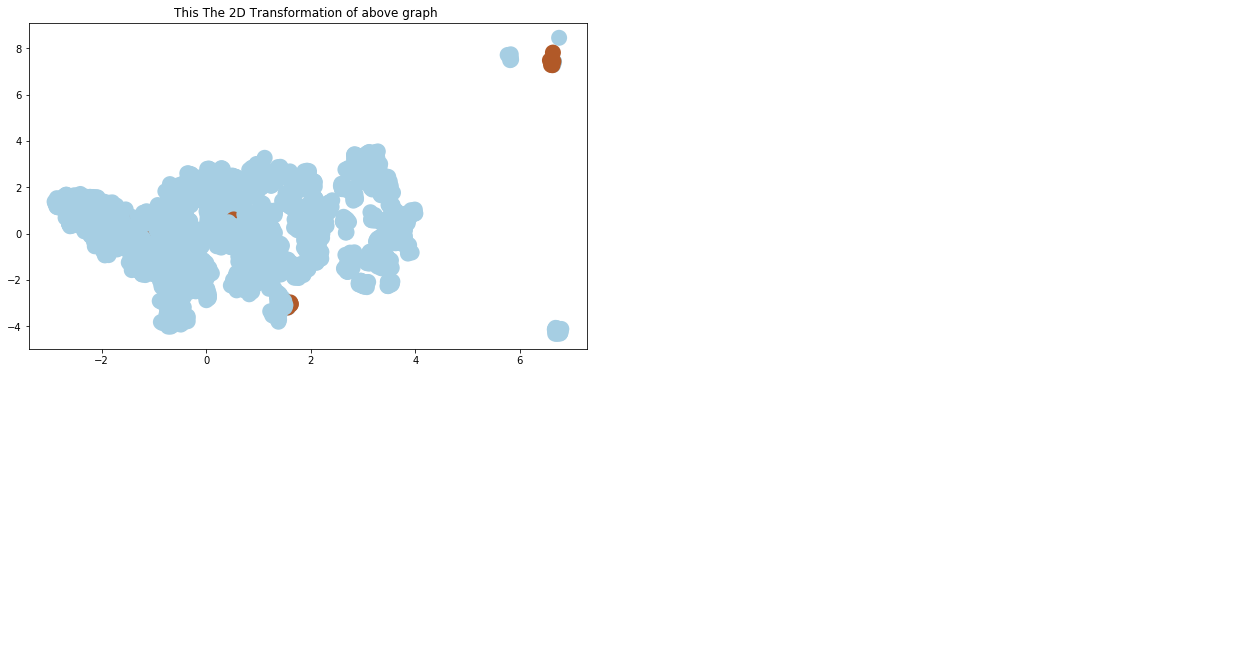

In [148]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(1, figsize=(10,6))
plt.scatter(X_reduced[:, 0],  X_reduced[:, 1], c=df['is_fraud'],cmap=plt.cm.Paired,linewidths=10)
plt.annotate('See The Brown Cluster',xy=(20,-20),xytext=(9,8),arrowprops=dict(facecolor='black', shrink=0.05))
#plt.scatter(test_reduced[:, 0],  test_reduced[:, 1],c='r')
plt.title("This The 2D Transformation of above graph ")

### Wow , See how we got our clusters and we differentiated fraud transactions from it. We can think of this as a cluster.
Here PCA play a very important role.
